# Quasi-Newton Methods
We introduce the Quasi-Newton methods in more detailed fashion in this chapter. We start with studying the rank 1 update algorithm of updating the approximate to the inverse of the Hessian matrix and then move on to studying the rank 2 update algorithms. The methods covered under the later category are the Davidon-Fletcher-Powell algorithm, the Broyden-Fletcher-Goldfarb-Shanno algorithm and more generally the Huang’s family of rank2 updates.

### Introduction to Quasi-Newton Methods
In the last part of the last chapter, the motivation to study quasi-Newton methods was introduced. To avoid high computational costs, the quasi-Newton methods adapt to using the inverse of the Hessian matrix of the objective function to compute the minimizer, unlike the Newton method where the inverse of the Hessian matrix is calculated at each iteration. The basic iterative formulation for the Newton’s method is given by

\begin{equation}
\mathbb{x}_j = \mathbb{x}_{j-1} - [\mathbb{H}f]^{-1}(\mathbb{x}_{j-1})\nabla f(\mathbb{x}_{j-1}), j = 1, 2, \ldots \nonumber 
\end{equation}
 

where, the descent direction at the $j-th$ step is given by
\begin{equation}
\mathbb{\delta_j} = - [\mathbb{H}f]^{-1}(\mathbb{x}_{j-1})\nabla f(\mathbb{x}_{j-1}) \nonumber
\end{equation}
 

If  $\beta_j$ is the selected step length along the $j-th$ descent direction and $\mathbb{B}f(\mathbb{x}_j)$ is the approximation to the inverse of the Hessian, $[\mathbb{H}f(\mathbb{x}_{j})]^{-1}$, then The Quasi-Newton method is written as the given iteration formula:
\begin{equation}
    \mathbb{x}_j = \mathbb{x}_{j-1}-\beta_j[\mathbb{B}f](\mathbb{x}_{j-1})\nabla f(\mathbb{x}_{j-1}) \tag{6.1}
\end{equation}

where, the descent direction $\delta_j$  is given by:
\begin{equation}
    \mathbb{\delta_j} = -[\mathbb{B}f](\mathbb{x}_{j-1})\nabla f(\mathbb{x}_{j-1}) \tag{6.2}
\end{equation}

Note that,
\begin{equation}
    [\mathbb{B}f](\mathbb{x}) \equiv [\mathbb{H}f]^{-1}(\mathbb{x}) \equiv [\mathbb{H}f(\mathbb{x})]^{-1} \tag{6.3}
\end{equation}


### The Approximate Inverse Matrix
Using Taylor’s theorem to approximate the gradient of the Objective function, we can write:
\begin{equation}
    \nabla f(\mathbb{x}) \simeq \nabla f(\mathbb{x}_0) + \mathbb{H}f(\mathbb{x})(\mathbb{x} - \mathbb{x}_0) \tag{6.4}
\end{equation}

So at iterates $x_j$ and $x_{j-1}$  Eq. ~ can be written as:
\begin{equation}
    \nabla f(\mathbb{x}_j) = \nabla \mathbb{f}(\mathbb{x}_0) + \mathbb{H}f(\mathbb{x}_j)(\mathbb{x}_j - \mathbb{x}_0) \tag{6.5}
\end{equation}
and
\begin{equation}
    \nabla f(\mathbb{x}_{j-1}) = \nabla f(\mathbb{x}_0) + \mathbb{H}f(\mathbb{x}_j)(\mathbb{x}_{j-1} - \mathbb{x}_0) \tag{6.6}
\end{equation}

So, subtracting Eq. (6.6) from Eq. (6.5), we get,

\begin{align}
    &&\nabla f(\mathbb{x}_j) - \nabla f(\mathbb{x}_{j-1}) &= \mathbb{H}f(\mathbb{x}_j)(\mathbb{x}_j - \mathbb{x}_{j-1}) \nonumber \\
    &\implies& \mathbb{H}f(\mathbb{x}_j)\mathbb{D}_j &= \mathbb{G}_j \nonumber \\
    &\implies& \mathbb{D}_j &= [\mathbb{H}f(\mathbb{x}_j)]^{-1}\mathbb{G}_j\nonumber\\
    &\implies& \mathbb{D}_j &= [\mathbb{B}f](\mathbb{x}_j)\mathbb{G}_j \tag{6.7}
\end{align}
 


Eq. (6.7) is the secant equation. Here, $[\mathbb{B}(\mathbb{x}_j)]$  is the approximate to the inverse of the Hessian matrix of the objective function $f$ at the $j-th$ iterate. As the iteration of the optimization technique advances in each step, it should be kept in mind that if  
$[\mathbb{B}f(x_{j-1})$ is symmetric and positive definite, then  
$\mathbb{B}f(\mathbb{x}_j)$ should be symmetric and positive definite. Various mechanisms have been developed for updating the inverse matrix, generally given by the formula:
\begin{equation}
    [\mathbb{B}f](\mathbb{x}_j) = [\mathbb{B}f](\mathbb{x}_{j-1}) + \mathbb{\Delta} \tag{6.8}
\end{equation}


### Rank 1 Update Algorithm

In the rank 1 update algorithm, the update matrix $\Delta$ is a rank 1 matrix. the rank of a matrix is given by its maximal number of linearly independent columns. To formulate a rank 1 update, we write the update matrix as:
\begin{equation}
    \mathbb{\Delta} = \sigma \mathbb{w} \otimes \mathbb{w} = \sigma \mathbb{w}\mathbb{w}^T \tag{6.9}
\end{equation} 

where, $\otimes$ is the outer product between two matrices/vectors. So, Eq. (6.8) becomes:
\begin{equation}
    [\mathbb{B}f](\mathbb{x}_j) = [\mathbb{B}f](\mathbb{x}_{j-1}) + \sigma \mathbb{w}\mathbb{w}^T \tag{6.10}
\end{equation}

Our task is to evaluate the explicit forms of the scalar constant $\sigma$ and the vector $\mathbb{w}$, where  
$\mathbb{w} \in \mathbb{R}^n$. Now, replacing $\mathbb{B}f](\mathbb{x}_j)$ in Eq.(6.7)~ with the one in Eq. (6.10), we have,
\begin{align}
    \mathbb{D}_j &= ([\mathbb{B}f](\mathbb{x}_{j-1}) + \sigma \mathbb{w}\mathbb{w}^T)\mathbb{G}_j \nonumber \\
    &= [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j + \sigma \mathbb{w}(\mathbb{w}^T\mathbb{G}_j) \tag{6.11}
\end{align}
 
This can be rearranged to write,
\begin{equation}
    \sigma \mathbb{w} = \frac{\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j}{\mathbb{w}^T\mathbb{G}_j} \tag{6.12}
\end{equation}
 
As $\mathbb{w}^T\mathbb{G}_j$ is a scalar, we see that it can be taken to the denominator in Eq. (6.12). Now, it is clearly evident that,
\begin{equation}
    \sigma = \frac{1}{\mathbb{w}^T\mathbb{G}_j} \tag{6.13}
\end{equation}
 
and
\begin{equation}
    \mathbb{w} = \mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j \tag{6.14}
\end{equation} 

So, Eq. (6.13) can now be written as:
\begin{equation}
    \sigma = \frac{1}{(\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j} \tag{6.15}
\end{equation} 

Eventually, the update matrix $\Delta$ from Eq. (6.9) turns out to be:
\begin{equation}
    \mathbb{\Delta} = \frac{(\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)(\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T}{(\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j} \tag{6.16}
\end{equation}

So, the rank 1 update formula is given by:

\begin{equation}
    [\mathbb{B}f](\mathbb{x}_j) = [\mathbb{B}f](\mathbb{x}_{j-1}) + \frac{(\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)(\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T}{(\mathbb{D}_j - [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j} \tag{6.17}
\end{equation}
 

In the updated formulation of the inverse matrix, most often  $[\mathbb{B}f](\mathbb{x}_0)$ is considered to be the $n \times n$ identity matrix. The iteration is continued until and unless the convergence criteria are satisfied. If $[\mathbb{B}f](\mathbb{x}_{j-1})$  is symmetric, then Eq. (6.17) ensures that  $[\mathbb{B}f](\mathbb{x}_{j})$ is symmetric too and is then called a symmetric rank 1 update algorithm or the SR1 update algorithm. Also, it can be seen that the columns of the update matrix $\Delta$ are multiples of each other, making it a rank 1 matrix.

The rank 1 update algorithm has an issue with the denominator in Eq. (6.17). The denominator can vanish and sometimes there would be no symmetric rank 1 update in the inverse matrix, satisfying the secant equation given by Eq. (6.7), even for a convex quadratic objective function. There are three cases that needs to be analyzed for a particular iterate $j$ in the optimization algorithm:

* If $\mathbb{w}^T\mathbb{G}_j \ne 0$, then there is a unique rank 1 update for the inverse matrix, given by Eq. (6.17),
* If $\mathbb{D}_j = [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j$, then the update given by Eq. (6.17) is skipped and we consider  $[\mathbb{B}f](\mathbb{x}_j) = [\mathbb{B}f](\mathbb{x}_{j-1})$, and
* if $\mathbb{D}_j \neq [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j$ and $\mathbb{w}^T\mathbb{G}_j = 0$, then there is no rank 1 update technique available that satisfies the secant equation given by Eq. (6.7).

In view of the second case mentioned above, there is a necessity to introduce a skipping criterion which will prevent the rank 1 update algorithm from crashing. The update of the inverse matrix at a particular iterate $j$, given by Eq. (6.17) must be applied if the following condition is satisfied:
\begin{equation}
    |\mathbb{w}^T\mathbb{G}_j| \geq \alpha_3\|\mathbb{G}_j\| \|\mathbb{w}\| \tag{6.18}
\end{equation}

otherwise, no update in the inverse matrix must be made. Here $\alpha_3$ is a very small number usually taken as $\alpha_3 \sim 10^{-8}$. The last case in the above-mentioned cases, however, gives the motivation to introduce a rank 2 update formulation for the inverse matrix, such that the singularity case defining the vanishing of the denominator can be avoided. 

Example 6.1 Let us consider Branin function as the objective function, given by:
\begin{equation}
    f(x_1, x_2) = a(x_2 - bx_1^2 + cx_1 - r)^2 + s(1-t)\cos(x_1)+s \tag{6.19}
\end{equation}
 
where $a,b,c,r,s$ and $t$ are constants whose default values are given in the table below:

| Constant                                            | Value     |
| --------------------------------------------------- | --------- |
| $a$                                                 | 1         |
| $b$                                                 | $\frac{5.1}{4\pi^2}$ |
| $c$                                                 | $\frac{5}{\pi}$  |
| $r$                                                 | 6         |
| $s$                                                 | 10        |
| $t$                                                 | $\frac{1}{8\pi}$ |


Considering the default constant values, Branin function has four minimizers given by:
 * $f(-\pi, 12.275) \simeq 0.397887$
 * $f(\pi, 2.275) \simeq 0.397887$
 * $f(3\pi, 2.475) \simeq 0.397887$, and
 * $f(5\pi, 12.875) \simeq 0.397887$
 
We will use Rank 1 update algorithm to find out one of these four minimizers. Let the starting iterate be $\mathbb{x}_j = \begin{bmatrix}11 \\ 5.75 \end{bmatrix}$, the tolerance be $\epsilon = 10^−5$, and the constants to be used in determining the step length using the strong Wolfe conditions be $\alpha_1 = 10^-4$ and $\alpha_2 = 0.24$. Let us define Branin function and its gradient in Python:

In [1]:
# import the required packages
import matplotlib.pyplot as plt
import numpy as np
import autograd.numpy as au
from autograd import grad, jacobian
import scipy
import pandas as pd

def func(x): # Objective function (Branin function)
    return (x[1] - (5.1/(4*au.pi**2))*x[0]**2 + (5/au.pi)*x[0] - 6)**2 + 10*(1 - 1/(8*au.pi))*au.cos(x[0]) + 10
    
Df = grad(func) # Gradient of the objective function

We first draw the contour plot of the Branin function and then define the Python function rank_1() implementing Rank 1 update algorithm:

<a list of 186 text.Text objects>

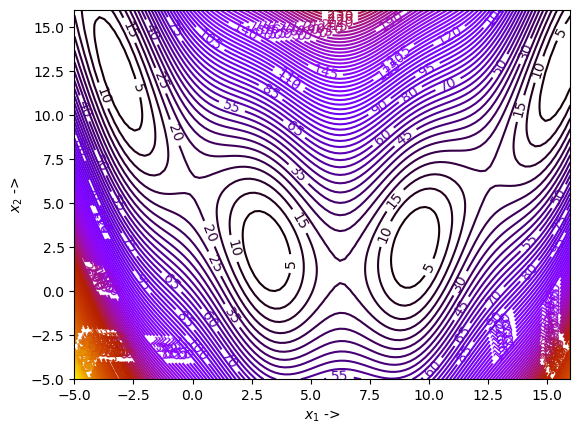

In [2]:
from scipy.optimize import line_search
NORM = np.linalg.norm

x1 = np.linspace(-5, 16, 100)
x2 = np.linspace(-5, 16, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])

contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
plt.clabel(contours, inline=1, fontsize=10)

In [3]:
def rank_1(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) # Selection of the direction of the steepest descent
        
        
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            #plt.plot(x1, x2, "rx-", ms=5.5) # Plot the final collected data showing the trajectory of optimization
            #plt.show()
            data = {
            'x1': x1,
            'x2': x2,
            'f1':func(x1),
            'f2':func(x2)}
            df = pd.DataFrame(data, columns = ['x1', 'x2', 'f1','f2'])
            return df
            #return X, func(X)
        else:
            Dj = X - Xj # See line 17 of the algorithm
            Gj = Df(X) - Grad # See line 18 of the algorithm
            w = Dj - Bf.dot(Gj) # See line 19 of the algorithm
            wT = w.T # Transpose of w
            sigma = 1/(wT.dot(Gj)) # See line 20 of the algorithm
            W = np.outer(w, w) # Outer product between w and the transpose of w
            Delta = sigma*W # See line 21 of the algorithm
            if abs(wT.dot(Gj)) >= 10**-8*NORM(Gj)*NORM(w): # update criterion (See line 22-24)
                Bf += Delta          
            Xj = X # Update to the new iterate
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]

Make sure all the relevant Python packages (eg. ```autograd``` as ```au``) have been imported and functions like ```NORM()``` have been already defined. Now, as asked in our example, we set our parameter values and pass them to the ```rank_1()``` function:

In [4]:
results4 = rank_1(np.array([11.8, 5.75]), 10**-5, 10**-4, 0.24)

<a list of 193 text.Text objects>

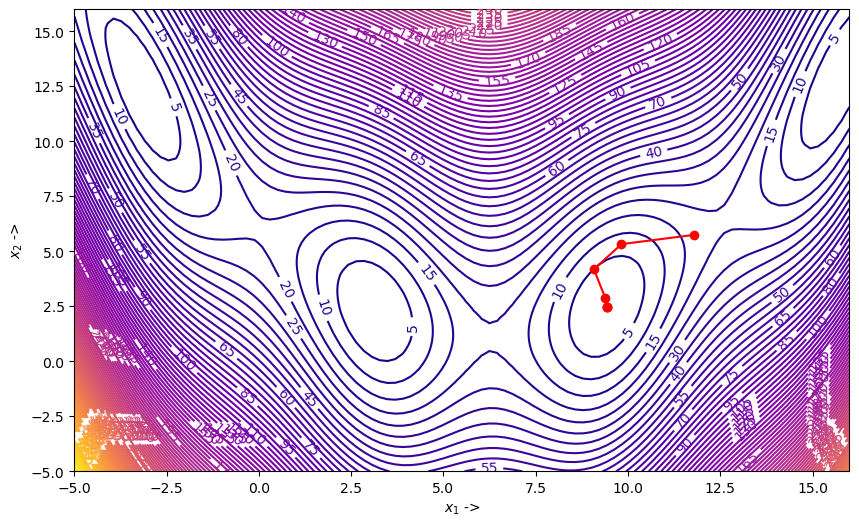

In [7]:
x1 = np.linspace(-5, 16, 100)
x2 = np.linspace(-5, 16, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
plt.figure(figsize=(10, 6))
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.plasma)
plt.plot(results4['x1'],results4['x2'],'ro-')
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
plt.clabel(contours, inline=1, fontsize=10)

We see that for our choice of parameters, the algorithm has converged to the minimizer $\mathbb{x}^* \sim \begin{bmatrix}3\pi \\ 2.475 \end{bmatrix}$  where the function value is $f(\mathbb{x}^*) \simeq 0.397887$.

We now discuss the Sherman-Morrison-Woodbury formula, which states that, for a square non-singular matrix $\mathbb{M}$ encountering a rank 1 update, given by:
\begin{equation}
    \bar{\mathbb{M}} = \mathbb{M} + \mathbb{a}\mathbb{b}^T \tag{6.20}
\end{equation}

where, $\mathbb{M}, \bar{{\mathbb{M}}} \in \mathbb{R}^{n \times n}$ and $a, b \in \mathbb{R}^n$, then if $\mathbb{M}$ is nonsingular, the inverse of  $\bar{{\mathbb{M}}}$ will be given by:
\begin{equation}
    \bar{\mathbb{M}}^{-1} = \mathbb{M}^{-1} - \frac{\mathbb{M}^{-1}\mathbb{ab}^T\mathbb{M}^{-1}}{1+\mathbb{b}^T\mathbb{M}^{-1}\mathbb{a}} \tag{6.21}
\end{equation}
 
which is the <i>Sherman-Morrison-Woodbury formula</i>.
<i>Proof.</i> To prove (6.21) we show that $\bar{\mathbb{M}}\bar{\mathbb{M}}^{-1}=\mathbb{I}$ 
\begin{align}
\bar{\mathbb{M}}\bar{\mathbb{M}}^{-1} &= (\mathbb{M} + \mathbb{ab}^T) \left( \mathbb{M}^{-1} - \frac{\mathbb{M}^{-1}\mathbb{ab}^T\mathbb{M}^{-1}}{1+\mathbb{b}^T\mathbb{M}^{-1}\mathbb{a}} \right) \nonumber \\
&= \mathbb{MM}^{-1} + \mathbb{ab}^T\mathbb{M}^{-1} - \frac{\mathbb{MM}^{-1}\mathbb{ab}^T\mathbb{M}^{-1} + \mathbb{ab}^T\mathbb{M}^{-1}\mathbb{ab}^T\mathbb{M}^{-1}}{1+\mathbb{b}^T\mathbb{M}^{-1}\mathbb{a}} \nonumber \\
&= \mathbb{I}+\mathbb{ab}^T\mathbb{M}^{-1} - \frac{\mathbb{ab}^T\mathbb{M}^{-1}\mathbb{ab}^T\mathbb{M}^{-1}\mathbb{ab}^T\mathbb{M}^{-1}}{1+\mathbb{b}^T\mathbb{M}^{-1}\mathbb{a}} \nonumber \\
&= \mathbb{I}+\mathbb{ab}^T\mathbb{M}^{-1} - \frac{\mathbb{a}(\mathbb{b}^T\mathbb{M}^{-1} + \mathbb{b}^T\mathbb{M}^{-1}\mathbb{a}\mathbb{b}^T\mathbb{M}^{-1})}{1+\mathbb{b}^T\mathbb{M}^{-1}\mathbb{a}} \nonumber \\
&= \mathbb{I}+\mathbb{ab}^T\mathbb{M}^{-1} - \frac{\mathbb{a}(1 + \mathbb{b}^T\mathbb{M}^{-1}\mathbb{a})\mathbb{b}^T\mathbb{M}^{-1}}{1+\mathbb{b}^T\mathbb{M}^{-1}\mathbb{a}} \nonumber \\
&= \mathbb{I} + \mathbb{ab}^T\mathbb{M}^{-1} - \mathbb{ab}^T\mathbb{M}^{-1} \nonumber \\
&= \mathbb{I} \nonumber 
\end{align} 

This completes the proof.
If the <i>Sherman-Morrison-Woodbury formula</i> is applied on Eq. 17, we will have,
\begin{equation}
    [\mathbb{H}f](\mathbb{x}_j) = [\mathbb{H}f](\mathbb{x}_{j-1}) + \frac{[\mathbb{G}_j - [\mathbb{H}f](\mathbb{x}_{j-1})\mathbb{D}_j][\mathbb{G}_j - [\mathbb{H}f](\mathbb{x}_{j-1})\mathbb{D}_j]^T}{(\mathbb{G}_j - [\mathbb{H}f](\mathbb{x}_{j-1})\mathbb{D}_j)^T\mathbb{D}_j} \tag{6.22}
\end{equation}
 

where, $[\mathbb{H}f](\mathbb{x}) = [\mathbb{B}f]^{-1}(\mathbb{x})$.

### Rank 2 Update Algorithms
We will be discussing the following algorithms under this category:

* Davidon-Fletcher-Powell (DFP) algorithm,
* Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm, and
* Huang’s family of rank 2 updates.

#### Davidon-Fletcher-Powell Algorithm

Eq. (6.8) gives the updating mechanism of the approximation to the inverse of the Hessian matrix of our objective function and Eq. (6.7) gives the secant equation. In rank 2 updates, the update matrix $\Delta$ is expressed as the sum of two rank 1 updates, given by:
\begin{equation}
    \mathbb{\Delta} = \sigma_1\mathbb{w}_1 \otimes \mathbb{w}_1 + \sigma_2\mathbb{w}_2 \otimes \mathbb{w}_2 = \sigma_1\mathbb{w}_1\mathbb{w}_1^T + \sigma_2\mathbb{w}_2\mathbb{w}_2^T \tag{6.32}
\end{equation}

such that, Eq. (6.8) becomes:
[
\begin{equation}
    [\mathbb{B}f](\mathbb{x}_j) = [\mathbb{B}f](\mathbb{x}_{j-1}) +  \sigma_1\mathbb{w}_1\mathbb{w}_1^T + \sigma_2\mathbb{w}_2\mathbb{w}_2^T \tag{6.33}
\end{equation}

Here, $\sigma_1$ and $\sigma_2$ are scalars and $\mathbb{w}_1, \mathbb{w}_2 \in \mathbb{R}^n. Now, Eq. (6.7) becomes:
\begin{equation}
    \mathbb{D}_j = [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j + \sigma_1\mathbb{w}_1(\mathbb{w}_1^T\mathbb{G}_j) + \sigma_2\mathbb{w}_2(\mathbb{w}_2^T\mathbb{G}_j) \tag{6.34}
\end{equation}
 

We notice that $\mathbb{w}^T_1\mathbb{G}_j$ and $\mathbb{w}^T_2\mathbb{G}_j$ are scalars. One of the non-unique combinations of choices that satisfy Eq. (6.34) is:
\begin{align}
    \mathbb{w}_1 &= \mathbb{D}_j \tag{6.35}\\
    \mathbb{w}_2 &= [\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j \tag{6.36}\\
    \sigma_1 &= \frac{1}{\mathbb{w}_1^T\mathbb{G}_j} \tag{6.37} \\
    \sigma_2 &= -\frac{1}{\mathbb{w}_2^T\mathbb{G}_j} \tag{6.38}
\end{align}
 

Eq. (6.37) and Eq. (6.38) can be rewritten as:
\begin{align}
    \sigma_1 &= \frac{1}{\mathbb{D}_j^T\mathbb{G}_j} \tag{6.39} \\
    \sigma_2 &= - \frac{1}{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j} \tag{6.40}
\end{align}
 

So Eq. (6.32) becomes:

\begin{equation}
    \mathbb{\Delta} = \frac{\mathbb{D}_j\mathbb{D}_j^T}{\mathbb{D}_j^T\mathbb{G}_j} - \frac{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T}{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j} \tag{6.41}
\end{equation}
 

Finally, the DFP update mechanism is given by:
\begin{equation}
    [\mathbb{B}f](\mathbb{x}_j) = [\mathbb{B}f](\mathbb{x}_{j-1}) + \frac{\mathbb{D}_j\mathbb{D}_j^T}{\mathbb{D}_j^T\mathbb{G}_j} - \frac{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T}{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j} \tag{6.42}
\end{equation}
 

In the update formulation, we will again consider $[\mathbb{B}f](\mathbb{x}_0)$ to be the $n \times n$ identity matrix and the iteration is continued until and unless the convergence criterion is satisfied. The last two terms in Eq. (6.42) are rank 1 updates, overall fetching a rank 2 update strategy. Note that the updated inverse matrix $[\mathbb{B}f](\mathbb{x}_j)$ is positive definite only if the optimal step length $\beta_j$ is computed accurately. 

Example 6.2 Let us consider Booth’s function as the objective function, given by:
\begin{equation}
    f(x_1, x_2) = (x_1+2x_2-7)^2+(2x_1+x_2-5)^2 \tag{6.43}
\end{equation}
 
The minimizer is at $\mathbb{x}^* = \begin{bmatrix}1\\3\end{bmatrix}$ and the function value at the minimizer is $0$. We will use DFP algorithm to find out the minimizer. Let the starting iterate be $\mathbb{x}_j = \begin{bmatrix}-7.8\\-3.753\end{bmatrix}$, the tolerance be $\epsilon = 10^-5$, and the constants to be used in determining the step length using the strong Wolfe conditions be $\alpha_1 = 10^-4$ and $\alpha_2 = 3.82$. Let us first define Booth’s function and its gradient in Python:

In [8]:
def func(x): # Objective function (Booth's function)
    return (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2
    
Df = grad(func) # Gradient of the objective function

Next, we define the Python function ```DFP()``` implementing the DFP algorithm:

<a list of 107 text.Text objects>

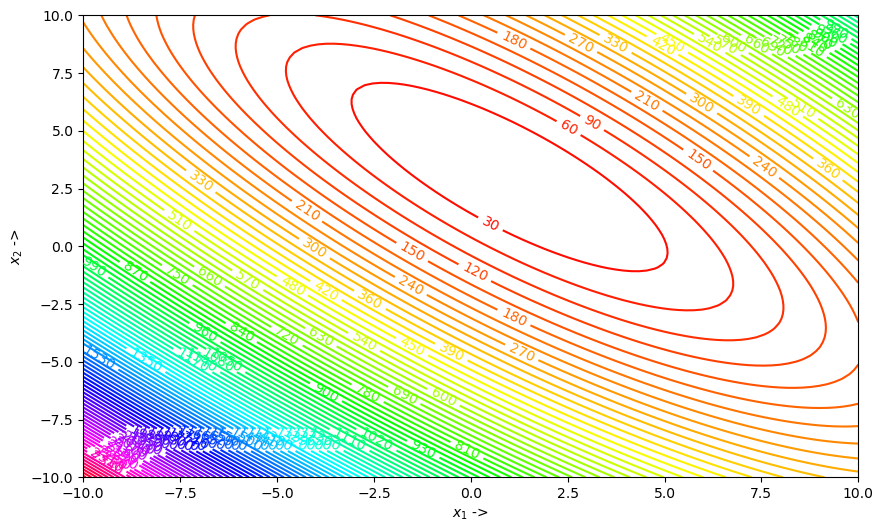

In [9]:
# draw the contour plot first
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
plt.figure(figsize=(10, 6))
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.hsv)
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
plt.clabel(contours, inline=1, fontsize=10)

In [10]:
def DFP(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) # Selection of the direction of the steepest descent
        
        
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            #plt.plot(x1, x2, "rx-", ms=5.5) # Plot the final collected data showing the trajectory of optimization
            #plt.show()
            data = {
            'x1': x1,
            'x2': x2,
            'f1':func(x1),
            'f2':func(x2)}
            df = pd.DataFrame(data, columns = ['x1', 'x2', 'f1','f2'])
            return df
            #return X, func(X)
        else:
            Dj = X - Xj # See line 16 of the algorithm
            Gj = Df(X) - Grad # See line 17 of the algorithm
            w1 = Dj # See line 18 of the algorithm
            w2 = Bf.dot(Gj) # See line 19 of the algorithm
            w1T = w1.T
            w2T = w2.T
            sigma1 = 1/(w1T.dot(Gj)) # See line 20 of the algorithm
            sigma2 = -1/(w2T.dot(Gj)) # See line 21 of the algorithm
            W1 = np.outer(w1, w1)
            W2 = np.outer(w2, w2)
            Delta = sigma1*W1 + sigma2*W2 # See line 22 of the algorithm
            Bf += Delta # See line 23 of the algorithm
            Xj = X # Update to the new iterate
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]

In [11]:
results3 = DFP(np.array([-7.8, -3.75]), 10**-5, 10**-4, 0.82)

<a list of 107 text.Text objects>

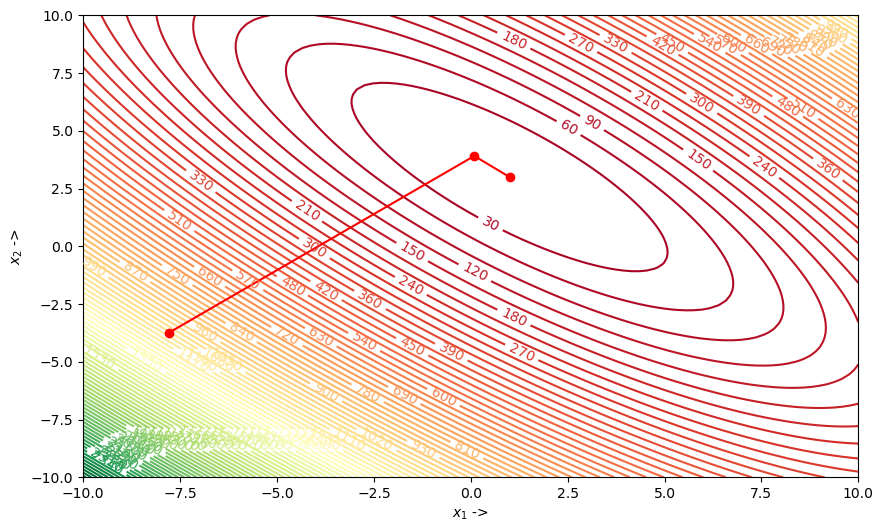

In [13]:
# draw the contour plot first
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
plt.figure(figsize=(10, 6))
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.RdYlGn)
plt.plot(results3['x1'],results3['x2'],'ro-')
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
plt.clabel(contours, inline=1, fontsize=10)

### Broyden-Fletcher-Goldfarb-Shanno (BFGS) Algorithm

In the BFGS algorithm, it is the Hessian matrix (instead of the approximate inverse of the Hessian) that gets updated iteratively at each step. Eq. (6.7) can be written as:

\begin{equation}
    \mathbb{G}_j = [\mathbb{H}f](\mathbb{x}_j)\mathbb{D}_j \tag{6.54}
\end{equation}
 
In Eq. (6.42), $[\mathbb{B}f](\mathbb{x}_j)$, $\mathbb{D}_j$ and $\mathbb{G}_j$ are replaced by $[\mathbb{H}f](\mathbb{x}_j)$, $\mathbb{G}_j$ and $\mathbb{D}_j$ respectively, giving,
\begin{equation}
     [\mathbb{H}f](\mathbb{x}_j) = [\mathbb{H}f](\mathbb{x}_{j-1}) + \frac{\mathbb{G}_j\mathbb{G}_j^T}{\mathbb{G}_j^T\mathbb{D}_j} - \frac{([\mathbb{H}f](\mathbb{x}_{j-1})\mathbb{D}_j)([\mathbb{H}f](\mathbb{x}_{j-1})\mathbb{D}_j)^T}{([\mathbb{H}f](\mathbb{x}_{j-1})\mathbb{D}_j)^T\mathbb{D}_j} \tag{6.55}
\end{equation}
But, for practical implementations, we use the following update rule for the inverse matrix:
\begin{align}
    [\mathbb{B}f](\mathbb{x}_j) &= [\mathbb{B}f](\mathbb{x}_{j-1}) + \left(1 + \frac{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j}{\mathbb{D}_j^T\mathbb{G}_j} \right)\frac{\mathbb{D}_j\mathbb{D}_j^T}{\mathbb{D}_j^T\mathbb{G}_j} \nonumber \\
    &- \frac{\mathbb{D}_j([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T}{\mathbb{D}_j^T\mathbb{G}_j} - \frac{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)\mathbb{D}_j^T}{\mathbb{D}_j^T\mathbb{G}_j} \tag{6.56}
\end{align}

The <i>BFGS</i> algorithm demonstrates a superlinear convergence near the minimizer [ref, Nocedal, Wright]. It can be considered the dual of the <i>DFP</i> algorithm and is a conjugate gradient method too. 

Example 6.3 We will consider the Branin function given in Eq. (6.19) as the objective function. We will use our BFGS algorithm to find out one of the four minimizers of Branin function. Let the starting iterate be $\mathbb{x}_j = \begin{bmatrix}1.5 \\ 7.75 \end{bmatrix}$, the tolerance be $\epsilon = 10^-5$ and the constant to be used in determining the step length using the strong Wolfe conditions be $\alpha_1 = 10^-4$ and $\alpha_2 = 0.25$. The Python function ```BFGS()``` implementing the BFGS algorithm is given below:

<a list of 107 text.Text objects>

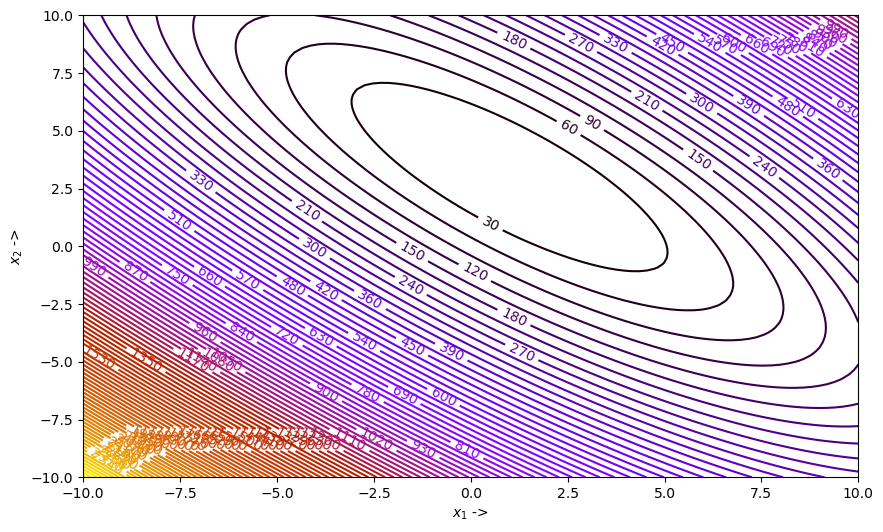

In [14]:
# draw the contour plot first
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
plt.figure(figsize=(10, 6))
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
plt.clabel(contours, inline=1, fontsize=10)

In [80]:
def BFGS(Xj, tol, alpha_1, alpha_2):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) # Selection of the direction of the steepest descent
                
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            #plt.plot(x1, x2, "rx-", ms=5.5) # Plot the final collected data showing the trajectory of optimization
            #plt.show()
            data = {
            'x1': x1,
            'x2': x2,
            'f1':func(x1),
            'f2':func(x2)}
            df = pd.DataFrame(data, columns = ['x1', 'x2', 'f1','f2'])
            return df
        else:
            Dj = X - Xj # See line 16 of the algorithm
            Gj = Df(X) - Grad # See line 17 of the algorithm
            
            den = Dj.dot(Gj)
            num = Bf.dot(Gj)
            
            L = 1 + num.dot(Gj)/den
            M = np.outer(Dj, Dj)/den
            N = np.outer(Dj, num)/den
            O = np.outer(num, Dj)/den
            
            Delta = L*M - N - O
            Bf += Delta # See line 18 and line 19 of the algorithm
            Xj = X # Update to the new iterate
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]

In [81]:
results = BFGS(np.array([5, -5.5]), 10**-5, 10**-4, 0.25)

In [82]:
results

x1        x2          f1          f2
0  5.000000 -5.500000  265.877636  628.229087
1  6.685893 -2.308845  265.877636  628.229087
2  1.000000  3.000000  265.877636  628.229087

<a list of 107 text.Text objects>

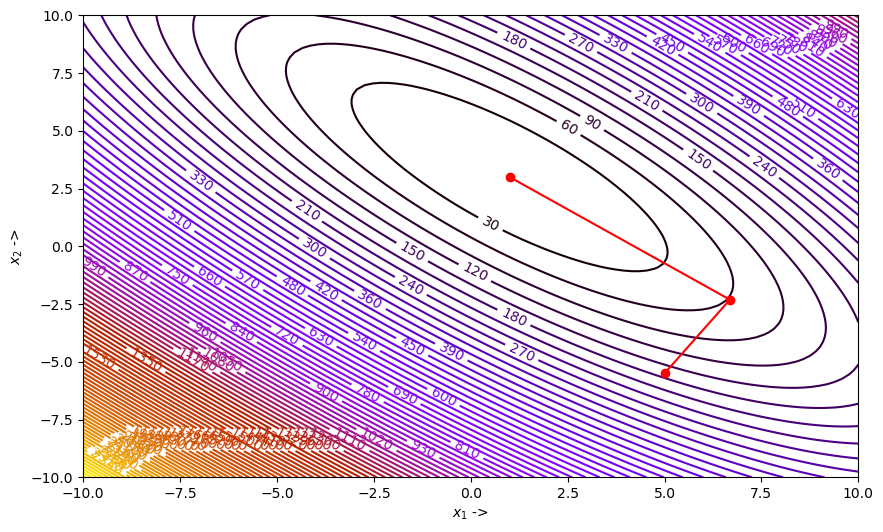

In [83]:
# draw the contour plot first
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
plt.figure(figsize=(10, 6))
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.plot(results['x1'],results['x2'],'ro-')
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
plt.clabel(contours, inline=1, fontsize=10)

We notice that for our choice of parameters, the algorithm has converged to the minimizer  
$\mathbb{x}^* \sim \begin{bmatrix}\pi \\ 2.275 \end{bmatrix}$, with $f(\mathbb{x}^*) \sim 0.397887$. The user can collect the data and show as a atble like we have been doing till now with the previous implementations.

Besides writing our own function BFGS(), we can use the ```minimize()``` function provided by the ```scipy.optimize``` module and pass the relevant parameters along with mentioning ```method='BFGS'``` to run the optimization using the BFGS algorithm. According to our example:

In [28]:
from scipy.optimize import minimize

def func(x): # Objective function
    return (x[1] - (5.1/(4*np.pi**2))*x[0]**2 + (5/np.pi)*x[0] - 6)**2 + 10*(1 - 1/(8*np.pi))*au.cos(x[0]) + 10

Df = grad(func) # Gradient of the objective function

res=minimize(fun=func, x0=np.array([1.5, 7.75]), jac=Df, method='BFGS', options={'gtol':10**-5, 'disp':True, 'return_all':True})

Optimization terminated successfully.
         Current function value: 0.397887
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9


In [29]:
res.x, res.fun, res.jac

(array([3.14159224, 2.27500172]),
 0.39788735773253414,
 array([-1.83062407e-06,  2.79763777e-06]))

We notice that the solver is successful in computing the minimizer $\mathbb{x}^* \sim \begin{bmatrix}\pi \\ 2.275 \end{bmatrix}$, with $f(\mathbb{x}^*) \sim 0.397887$. If the user wants to print out the optimization data, just type:

In [30]:
for i in res.allvecs: print(i)

[1.5  7.75]
[1.54136343 6.74084735]
[2.74524225 4.90614431]
[3.98569038 1.30071065]
[3.26267579 1.91706949]
[3.13418776 2.3139674 ]
[3.14054173 2.27403772]
[3.14184526 2.27502139]
[3.14159224 2.27500172]


### Huang’s Family of Rank 2 Update Formulae

In the Huang’s family of rank 2 updates, the approximate to the inverse of the Hessian matrix is updated as the following:
\begin{align}
    [\mathbb{B}f](\mathbb{x}_j) &= \phi \left([\mathbb{B}f](\mathbb{x}_{j-1}) - \frac{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T}{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j} + \theta \mathbb{S}_j\mathbb{S}_j^T \right) \nonumber \\
    &+ \frac{\mathbb{D}_j\mathbb{D}_j^T}{\mathbb{D}_j^T\mathbb{G}_j}
\end{align}
 

where, $\mathbb{S}_j$ is given by:
\begin{equation}
    \mathbb{S}_j = \sqrt{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j}\left(\frac{\mathbb{D}_j}{\mathbb{D}_j^T\mathbb{G}_j} - \frac{[\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j}{([\mathbb{B}f](\mathbb{x}_{j-1})\mathbb{G}_j)^T\mathbb{G}_j}\right)
\end{equation}
 
$\phi$ and $\theta$ are constant parameters and $[\mathbb{B}f](\mathbb{x}_j)$  is positive definite if $[\mathbb{B}f](\mathbb{x}_{j-1})$ is positive definite. The constants $\phi$ and $\theta$ are varied to procure us different rank 2 algorithms. The special cases are: when $\phi = 1$ and $\theta = 0$, we obtain the Davidon-Fletcher-Powell (DFP) algorithm and when $\phi = 1$ and $\theta = 1$, we obtain the Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm. The value of $\theta$ is usually restricted such that $\theta \in [0, 1]$.

We define a Python function huang() implementing Huang’s family of rank 2 updates . All the other necessary functions and Python codes are left for the reader to fill up according to any example they chose to explore.

In [31]:
def huang(Xj, tol, alpha_1, alpha_2, phi, theta):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) # Selection of the direction of the steepest descent
                
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta, c1=alpha_1, c2=alpha_2)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            #plt.plot(x1, x2, "rx-", ms=5.5) # Plot the final collected data showing the trajectory of optimization
            #plt.show()
            data = {
            'x1': x1,
            'x2': x2,
            'f1':func(x1),
            'f2':func(x2)}
            df = pd.DataFrame(data, columns = ['x1', 'x2', 'f1','f2'])
            return df
        else:
            Dj = X - Xj # See line 17 of the algorithm
            Gj = Df(X) - Grad # See line 18 of the algorithm
            
            den = Dj.dot(Gj)
            num = Bf.dot(Gj)
            
            Sj = au.sqrt(num.dot(Gj))*(Dj/den - num/(num.dot(Gj))) # See line 19 of algorithm
            Bf = phi*(Bf - np.outer(num, num)/(num.dot(Gj)) + theta*np.outer(Sj, Sj)) + np.outer(Dj, Dj)/(Dj.dot(Gj))
            Xj = X # Update to the new iterate
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]

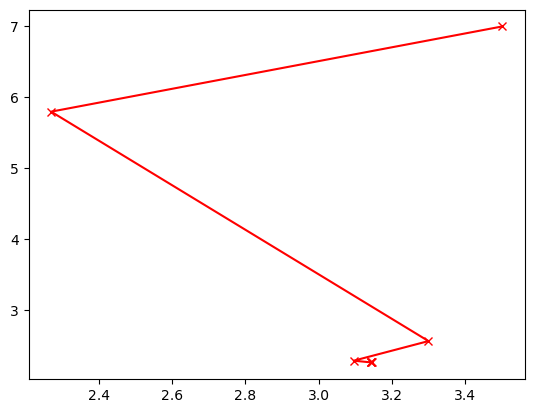

In [49]:
results2 = huang(np.array([3.5, 7]), 10**-5, 10**-4, 0.25, phi=1.0, theta=1.0)

In [50]:
results2

x1        x2        f1         f2
0  3.500000  7.000000  1.074543  38.497267
1  2.269974  5.799858  1.074543  38.497267
2  3.299263  2.567552  1.074543  38.497267
3  3.095349  2.291167  1.074543  38.497267
4  3.145413  2.266149  1.074543  38.497267
5  3.141544  2.275776  1.074543  38.497267
6  3.141585  2.274986  1.074543  38.497267
7  3.141593  2.275000  1.074543  38.497267

<a list of 173 text.Text objects>

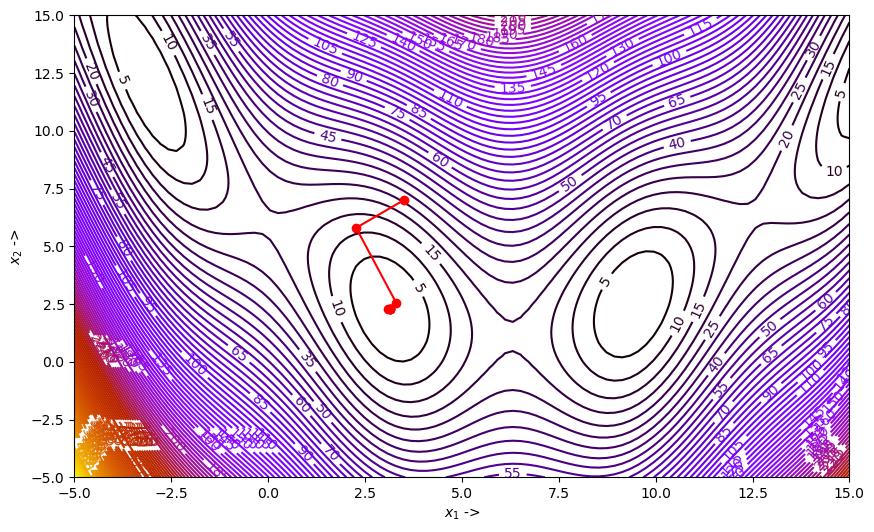

In [51]:
# draw the contour plot first
x1 = np.linspace(-5, 15, 100)
x2 = np.linspace(-5, 15, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])
plt.figure(figsize=(10, 6))
contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.plot(results2['x1'],results2['x2'],'ro-')
plt.xlabel("$x_1$ ->")
plt.ylabel("$x_2$ ->")
plt.clabel(contours, inline=1, fontsize=10)